<h1>Dados Covid-19</h1>
<p>Objetivos:</p>
<ul>
  <li>Análise exploratória de dados da Covid-19.</li>
  <li>Separar dados dos municípios do estado do Rio de Janeiro.</li>
  <li>Transformação dos dados em séries temporais, com o número de mortes diárias por 1.000 habitantes.</li>
</ul>
<p>Dados obtidos do site <a href="https://brasil.io">Brasil.io</a>. O qual disponibiliza não apenas os dados como também documentação, diversas visualizações dos dados, uma API de acesso, código fonte de tudo além de boa documentação.</p>
<p>URL direta dos dados: <a href="https://brasil.io/dataset/covid19/files/">https://brasil.io/dataset/covid19/files/</a>.</p>
<p>Data de download: 02/03/2021</p>

<p>Carga dos dados.</p>

In [1]:
arquivo <- "caso.csv"

if (! file.exists(arquivo)) {
  url <- "https://data.brasil.io/dataset/covid19/caso.csv.gz"
  download.file(url, destfile = arquivo, method = "curl")
  untar('caso.csv.gz')
}

dados <- read.csv(arquivo, header = TRUE, stringsAsFactors = FALSE)

<p>Os dados já vem com um cabeçalho, o que ajuda muito!</p>
<p>No github referente ao site <a href="https://brasil.io">Brasil.io</a>, existe documentação relacionada aos dados, a qual reproduzo logo abaixo. Quem quiser pode acessar a documentação original clicando <a href="https://github.com/turicas/covid19-br/blob/master/api.md#casos">aqui</a>.</p>
<p>Colunas:</p>
<ul>
<li>date: data de coleta dos dados no formato YYYY-MM-DD.</li>
<li>state: sigla da unidade federativa, exemplo: SP.</li>
<li>city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).</li>
<li>place_type: tipo de local que esse registro descreve, pode ser city ou state.</li>
<li>order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.</li>
<li>is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).</li>
<li>city_ibge_code: código IBGE do local.</li>
<li>confirmed: número de casos confirmados.</li>
<li>deaths: número de mortes.</li>
<li>estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).</li>
<li>estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.</li>
<li>confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes (baseado em estimated_population).</li>
<li>death_rate: taxa de mortalidade (mortes / confirmados).</li>
</ul>
<p>Ainda assim, vamos fazer uma análise exploratória:</p>

<p>Vejamos algumas linhas das informações que ele traz.</p>

In [2]:
head(dados)

date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
2021-03-15,AC,,state,62940,1129,364,True,881935,894470,12,7036.569,0.0179
2021-03-14,AC,,state,62620,1122,363,False,881935,894470,12,7000.794,0.0179
2021-03-13,AC,,state,62332,1116,362,False,881935,894470,12,6968.596,0.0179
2021-03-12,AC,,state,61709,1106,361,False,881935,894470,12,6898.946,0.0179
2021-03-11,AC,,state,61394,1094,360,False,881935,894470,12,6863.729,0.0178
2021-03-10,AC,,state,61121,1083,359,False,881935,894470,12,6833.208,0.0177


In [3]:
tail(dados)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1616754,2020-06-24,SP,Óleo,city,1,0,6,False,2496,2471,3533809,40.46945,0
1616755,2020-06-23,SP,Óleo,city,1,0,5,False,2496,2471,3533809,40.46945,0
1616756,2020-06-22,SP,Óleo,city,1,0,4,False,2496,2471,3533809,40.46945,0
1616757,2020-06-21,SP,Óleo,city,1,0,3,False,2496,2471,3533809,40.46945,0
1616758,2020-06-20,SP,Óleo,city,1,0,2,False,2496,2471,3533809,40.46945,0
1616759,2020-06-19,SP,Óleo,city,1,0,1,False,2496,2471,3533809,40.46945,0


<p>Informações básicas sobre os atributos do conjunto de dados:</p>

In [4]:
str(dados)

'data.frame':	1616759 obs. of  13 variables:
 $ date                          : chr  "2021-03-15" "2021-03-14" "2021-03-13" "2021-03-12" ...
 $ state                         : chr  "AC" "AC" "AC" "AC" ...
 $ city                          : chr  "" "" "" "" ...
 $ place_type                    : chr  "state" "state" "state" "state" ...
 $ confirmed                     : int  62940 62620 62332 61709 61394 61121 60721 60656 60288 60070 ...
 $ deaths                        : int  1129 1122 1116 1106 1094 1083 1071 1066 1063 1054 ...
 $ order_for_place               : int  364 363 362 361 360 359 358 357 356 355 ...
 $ is_last                       : chr  "True" "False" "False" "False" ...
 $ estimated_population_2019     : int  881935 881935 881935 881935 881935 881935 881935 881935 881935 881935 ...
 $ estimated_population          : int  894470 894470 894470 894470 894470 894470 894470 894470 894470 894470 ...
 $ city_ibge_code                : int  12 12 12 12 12 12 12 12 12 12 ...
 $ c

<p>Sumarizando os dados temos informações mais detalhadas sobre cada um dos atributos:</p>
<ul>
    <li><i>city</i> possui 9453 registros com este atributo vazio (são dados dos estados) e 5774 registros com o valor <i>Importados/Indefinidos</i>.</li>
    <li><i>confirmed</i> e <i>deaths</i> possuem valores baixos (amém), com mediana baixa, média maior (possívelmente puxada para cima por conta do valor máximo).</li>
    <li>As colunas de população estimada <i>estimated_population</i> e a coluna <i>city_ibge_code</i> possuem o mesmo número de valores <i>NA</i> (not available). Isso acaba refletindo na coluna <i>confirmed_per_100k_inhabitants</i>. Os <i>NA</i> devem ser para cidades novas, que não apareciam no censo do IBGE e também para os <i>Importados/Indefinidos</i> da coluna <i>city</i>.</li>
    <li>Os dados fazem sentido. Os campos <i>confirmed</i>, <i>deaths</i>, <i>estimated_population_2019</i>, <i>estimated_population</i>, <i>confirmed_per_100k_inhabitants</i> e <i>death_rate</i> tem valores maiores ou iguais a zero (afora os <i>NA</i>)</li>
</ul>  

In [5]:
summary(dados)

     date              state               city            place_type       
 Length:1616759     Length:1616759     Length:1616759     Length:1616759    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   confirmed           deaths         order_for_place   is_last         
 Min.   :      0   Min.   :    0.00   Min.   :  1.0   Length:1616759    
 1st Qu.:     31   1st Qu.:    0.00   1st Qu.: 72.0   Class :character  
 Median :    139   Median :    3.00   Median :144.0   Mode  :character  
 Mean   :   1891   Mean   :   52.69   Mean   :147.4                     
 3rd Qu.:    495   

<p>Vamos manter apenas os dados dos municípios do estado do Rio de Janeiro e vamos remover colunas que não serão utilizadas <i>state</i> (é sempre <i>RJ</i>), <i>place_type</i> (é sempre <i>city</i>) e <i>estimated_population_2019</i>:</p>

In [6]:
dados <- dados[dados$state == "RJ" & dados$place_type == "city", ]
dados <- dados[ , - c(2, 4, 9)] # state, place_type, estimated_population_2019

<p>Existem NAs?</p>

In [7]:
any(is.na(dados))

[1] TRUE

<p>Em que coluna?</p>

In [8]:
colSums(is.na(dados))

date                           city 
                             0                              0 
                     confirmed                         deaths 
                             0                              0 
               order_for_place                        is_last 
                             0                              0 
          estimated_population                 city_ibge_code 
                           355                            355 
confirmed_per_100k_inhabitants                     death_rate 
                           434                              0

<p>Vamos ver:</p>

In [9]:
dados[is.na(dados$estimated_population), ]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
808042,2021-03-14,Importados/Indefinidos,0,0,355,True,NA,NA,NA,0
808043,2021-03-13,Importados/Indefinidos,0,0,354,False,NA,NA,NA,0
808044,2021-03-12,Importados/Indefinidos,0,0,353,False,NA,NA,NA,0
808045,2021-03-11,Importados/Indefinidos,0,0,352,False,NA,NA,NA,0
808046,2021-03-10,Importados/Indefinidos,0,0,351,False,NA,NA,NA,0
808047,2021-03-09,Importados/Indefinidos,0,0,350,False,NA,NA,NA,0
808048,2021-03-08,Importados/Indefinidos,0,0,349,False,NA,NA,NA,0
808049,2021-03-07,Importados/Indefinidos,0,0,348,False,NA,NA,NA,0
808050,2021-03-06,Importados/Indefinidos,0,0,347,False,NA,NA,NA,0
808051,2021-03-05,Importados/Indefinidos,0,0,346,False,NA,NA,NA,0


<p>Ah, esqueci de retirar os os <i>Importados/Indefinidos</i>:</p>

In [10]:
dados <- dados[dados$city != "Importados/Indefinidos", ]

<p>Ainda existem NAs?</p>

In [11]:
any(is.na(dados))

[1] TRUE

<p>Que chato! Em que coluna?</p>

In [12]:
colSums(is.na(dados))

date                           city 
                             0                              0 
                     confirmed                         deaths 
                             0                              0 
               order_for_place                        is_last 
                             0                              0 
          estimated_population                 city_ibge_code 
                             0                              0 
confirmed_per_100k_inhabitants                     death_rate 
                            79                              0

<p>Vamos dar uma olhada:</p>

In [13]:
dados[is.na(dados$confirmed_per_100k_inhabitants), ]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
809403,2020-04-30,Italva,0,0,4,False,15299,3302056,NA,0
809404,2020-04-29,Italva,0,0,3,False,15299,3302056,NA,0
809405,2020-04-28,Italva,0,0,2,False,15299,3302056,NA,0
811690,2020-05-07,Macuco,0,0,15,False,5623,3302452,NA,0
811691,2020-05-06,Macuco,0,0,14,False,5623,3302452,NA,0
811692,2020-05-05,Macuco,0,0,13,False,5623,3302452,NA,0
811693,2020-05-04,Macuco,0,0,12,False,5623,3302452,NA,0
811694,2020-05-03,Macuco,0,0,11,False,5623,3302452,NA,0
811695,2020-05-02,Macuco,0,0,10,False,5623,3302452,NA,0
811696,2020-05-01,Macuco,0,0,9,False,5623,3302452,NA,0


<p>Não parece que isso vai atrapalhar em nada. Ao que parece o atributo <i>confirmed_per_100k_inhabitants</i> ficou com valor <i>NA</i> sempre que <i>confirmed</i> tem o valor 0 (zero). Vamos confirmar:</p>

In [14]:
nrow(dados[is.na(dados$confirmed_per_100k_inhabitants), ]) == nrow(dados[dados$confirmed == 0, ])

[1] TRUE

<p>Qual o máximo de mortes e os dados de onde ocorreu?</p>

In [15]:
dados[dados$deaths == max(dados$deaths), ]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
821522,2021-03-14,Rio de Janeiro,213488,19380,362,True,6747815,3304557,3163.809,0.0908


<p>Vamos plotar alguns gráficos.</p>
<p>Primeiro carregando a biblioteca necessária:</p>

In [16]:
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<p>Agora sim o gráfico:</p>

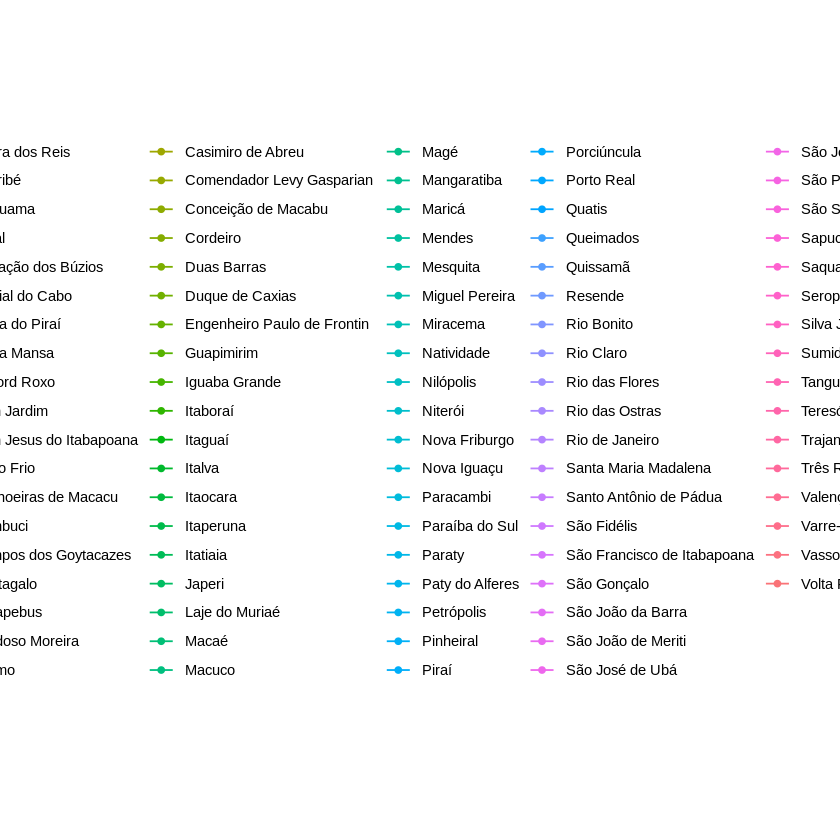

In [17]:
ggplot(dados, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city)) +
  geom_line(aes(color=city)) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>Ops! Muita coisa para um só gráfico. Vamos remover a legenda.</p>

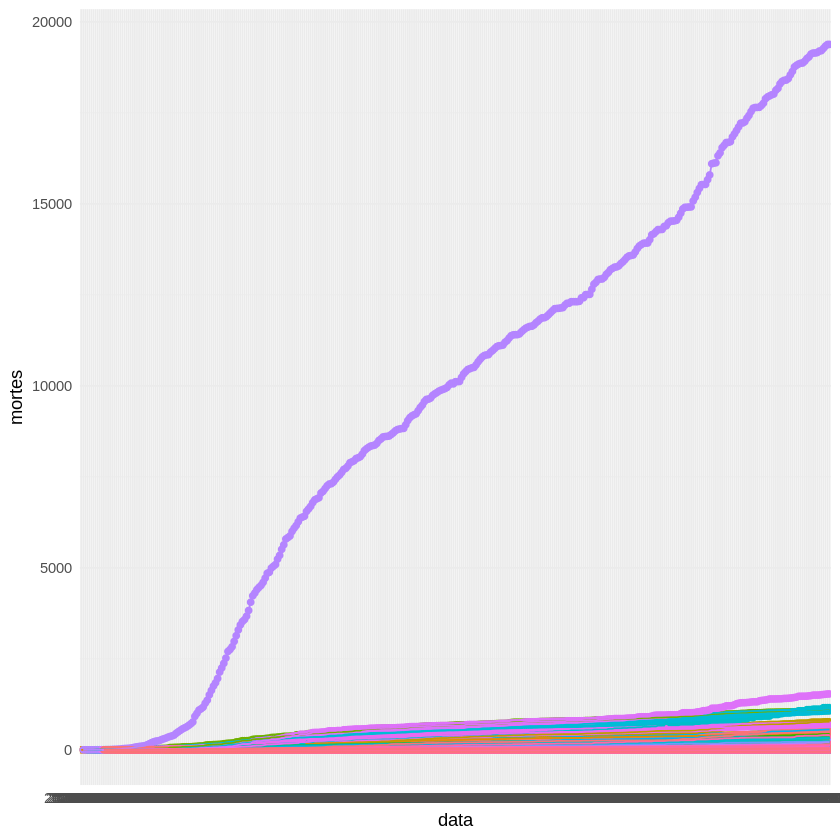

In [18]:
ggplot(dados, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>Ops! Muitos dados para um só gráfico, além disso um município é muito maior que os outros. Vamos diminuir o conjunto, selecionando apenas alguns municípios para poder plotar.</p>

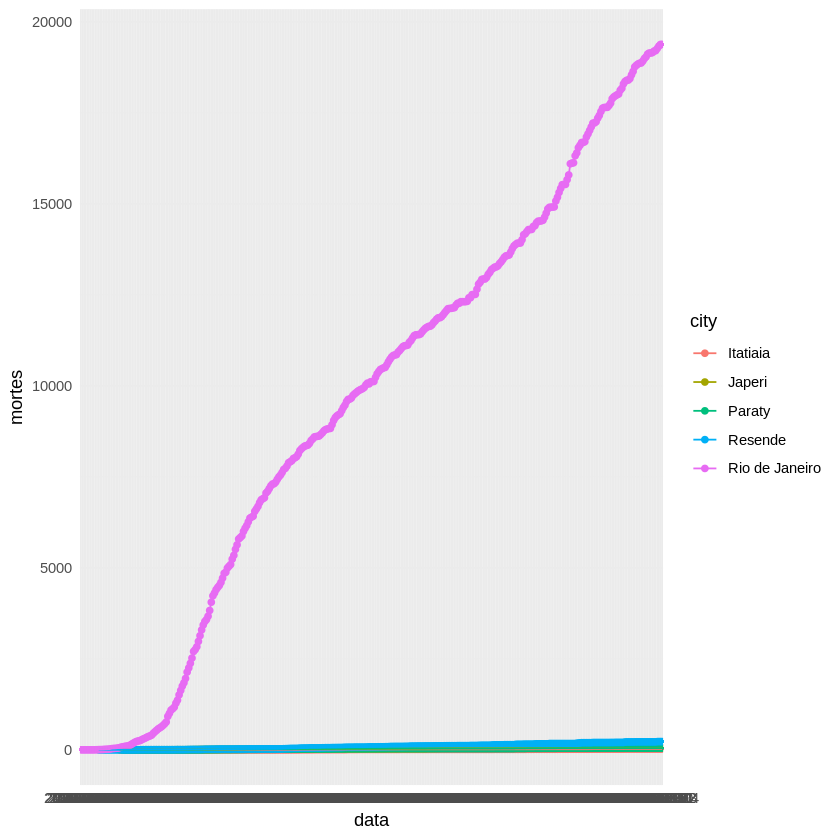

In [19]:
temp <- dados[dados$city %in% c("Japeri", "Resende", "Itatiaia", "Rio de Janeiro", "Paraty"), ]

ggplot(temp, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city)) +
  geom_line(aes(color=city)) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>O Rio de Janeiro cresce muito mais que os outros municípios, por ser uma região metropolitana. Assim não dá pra ver os outros. Vamos tirar o Rio de Janeiro por enquanto.</p>

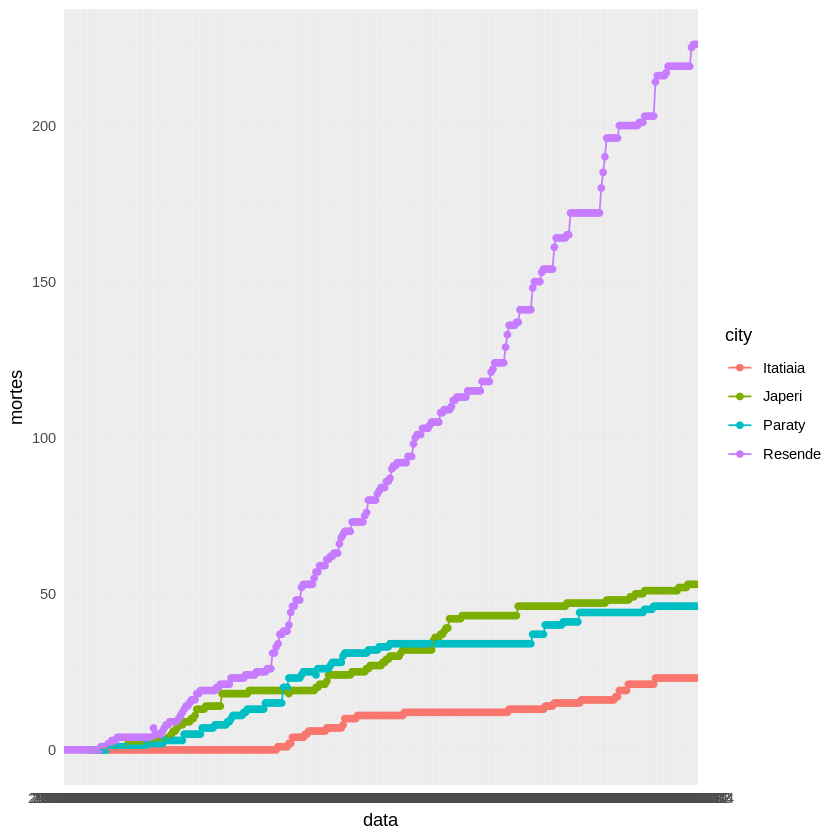

In [20]:
temp <- dados[dados$city %in% c("Japeri", "Resende", "Itatiaia", "Paraty"), ]

ggplot(temp, aes(x=date, y=deaths, group=city)) +
  geom_point(aes(color=city)) +
  geom_line(aes(color=city)) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>É importante observar que o gráfico só cresce! O dado de mortes é cumulativo!!! Eu não havia percebido isso até agora!</p>
<p>A data na parte de baixo do gráfico também não ficou boa...</p>

<p>Vamos criar um novo atributo com o número de mortes por dia:</p>

In [21]:
dados$deaths_day <- 0

municipios <- sort(unique(dados$city))

for (municipio in municipios) {
  indices <- sort(dados[dados$city == municipio, "order_for_place"])
  acumulado <- 0
  for (indice in indices) {
    mortes_no_dia <- dados[dados$city == municipio & dados$order_for_place == indice, "deaths"] - acumulado
    dados[dados$city == municipio & dados$order_for_place == indice, "deaths_day"] <- mortes_no_dia
    acumulado <- dados[dados$city == municipio & dados$order_for_place == indice, "deaths"]
  }
}

<p>Em R deve ser possível fazer sem usar dois laços (um <i>for</i> dentro do outro). Ainda vou tentar descobrir como...</p>

<p>Ficou tudo certo? Ficou algum número negativo?</p>

In [22]:
any(dados$deaths_day < 0)

[1] TRUE

<p>Eita! Será que eu errei no código? Vejamos os dados:</p>

In [23]:
dados[dados$deaths_day < 0,]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
798778,2021-02-25,Angra dos Reis,10868,346,329,False,207044,3300100,5249.12579,0.0318,-1
798978,2020-08-06,Angra dos Reis,3976,119,129,False,207044,3300100,1920.36475,0.0299,-1
799039,2020-06-05,Angra dos Reis,1081,41,68,False,207044,3300100,522.11124,0.0379,-1
799705,2020-06-07,Araruama,219,28,66,False,134293,3300209,163.07626,0.1279,-1
799829,2021-01-13,Areal,328,9,272,False,12669,3300225,2588.99676,0.0274,-1
800340,2020-07-14,Armação dos Búzios,188,8,92,False,34477,3300233,545.29106,0.0426,-2
800892,2020-11-16,Barra Mansa,3874,181,247,False,184833,3300407,2095.94607,0.0467,-1
801025,2020-07-04,Barra Mansa,567,35,114,False,184833,3300407,306.76340,0.0617,-1
801509,2021-02-14,Belford Roxo,16796,426,322,False,513118,3300456,3273.32115,0.0254,-1
801574,2020-12-09,Belford Roxo,11657,360,257,False,513118,3300456,2271.79713,0.0309,-1


<p>Vamos olhar um exemplo e ver os dados originais para um exemplo, o próprio registro e uns antes:</p>

In [24]:
dados[dados$city == "Araruama" & dados$order_for_place %in% c(64, 65, 66, 67),]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
799704,2020-06-08,Araruama,219,28,67,False,134293,3300209,163.0763,0.1279,0
799705,2020-06-07,Araruama,219,28,66,False,134293,3300209,163.0763,0.1279,-1
799706,2020-06-06,Araruama,163,29,65,False,134293,3300209,121.3764,0.1779,1
799707,2020-06-05,Araruama,160,28,64,False,134293,3300209,119.1425,0.1750,0


<p>Ficou difícil de ver, vamos melhorar isso, vendo só algumas colunas:</p>

In [25]:
dados[dados$city == "Araruama" & dados$order_for_place %in% c(64, 65, 66, 67), c(1,2,4,11)]

,date,city,deaths,deaths_day
799704,2020-06-08,Araruama,28,0
799705,2020-06-07,Araruama,28,-1
799706,2020-06-06,Araruama,29,1
799707,2020-06-05,Araruama,28,0


<p>Do dia <i>2020-06-06</i> para o dia <i>2020-06-07</i> alguém ressucitou!!! Aleluia!</p>
<p>Ou os dados não são confiáveis... Talvez não por culpa do pessoal do Brasil.io, mas sim das secretarias de saúde.</p>
<p>Qual o pior caso?</p>

In [26]:
dados[dados$deaths_day == min(dados$deaths_day),]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
814814,2020-12-24,Niterói,22420,675,282,False,515317,3303302,4350.72,0.0301,-111


<p>Cento e onze ressucitaram no mesmo dia! Vamos ver mais detalhes:</p>

In [27]:
dados[dados$city == "Niterói" & dados$order_for_place %in% c(281, 282, 283), c(1,2,4,11)]

,date,city,deaths,deaths_day
814813,2020-12-25,Niterói,675,0
814814,2020-12-24,Niterói,675,-111
814815,2020-12-23,Niterói,786,121


<p>Sem muito o que fazer, vou zerar todos os negativos.</p>

In [28]:
dados[dados$deaths_day < 0, "deaths_day"] <- 0

<p>Agora como ficaram os dados?</p>

In [29]:
min(dados$deaths_day)

max(dados$deaths_day)

[1] 0

[1] 307

<p>Nada como um gráfico para ver como ficou o novo dado:</p>

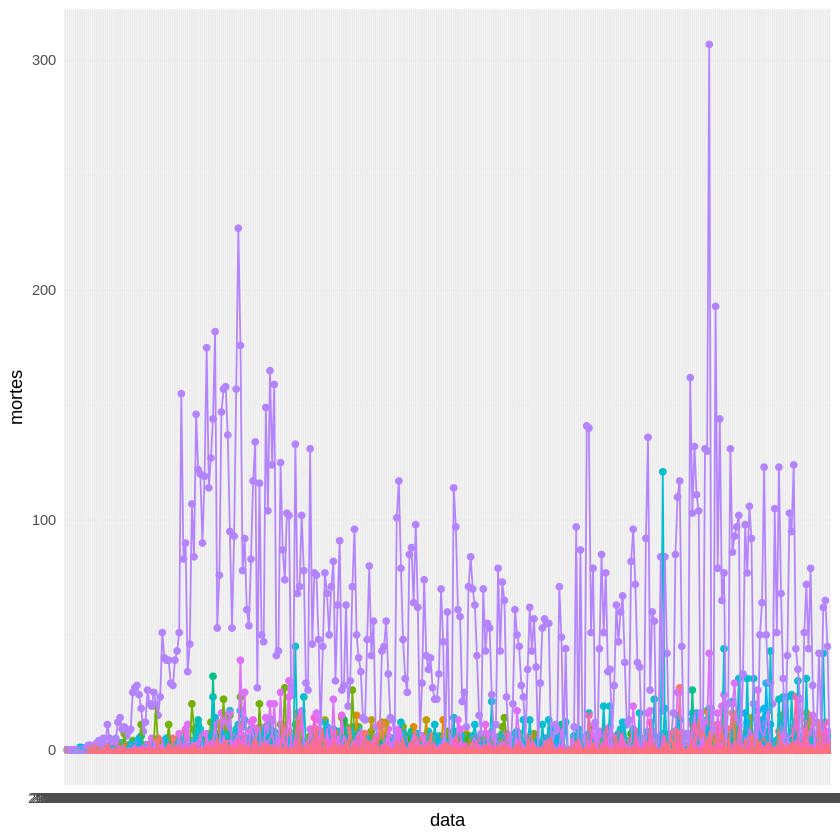

In [30]:
ggplot(dados, aes(x=date, y=deaths_day, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>Um único município passa de 200 mortes/dia (duas vezes) e com frequência passa de 100. A maioria não chega nem perto de 50 mortes/dia (ainda bem).</p>

<p>Que município é esse?</p>

In [31]:
dados[dados$deaths_day > 200,]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
821579,2021-01-16,Rio de Janeiro,179478,16101,305,False,6747815,3304557,2659.794,0.0897,307
821802,2020-06-03,Rio de Janeiro,32951,4055,82,False,6747815,3304557,488.321,0.1231,227


<p>Rio de Janeiro.</p>
<p>Seria melhor se todos fossem medidos com uma mesma escala. Os dados já trazem uma coluna que usa isso <i>confirmed_per_100k_inhabitants</i>, vamos algo parecido para o número de mortes por dia:</p>

In [32]:
dados$deaths_day_per_1k_inhabitants <- 1000 * dados$deaths_day / dados$estimated_population

<p>Como fica o gráfico para esse novo atributo?</p>

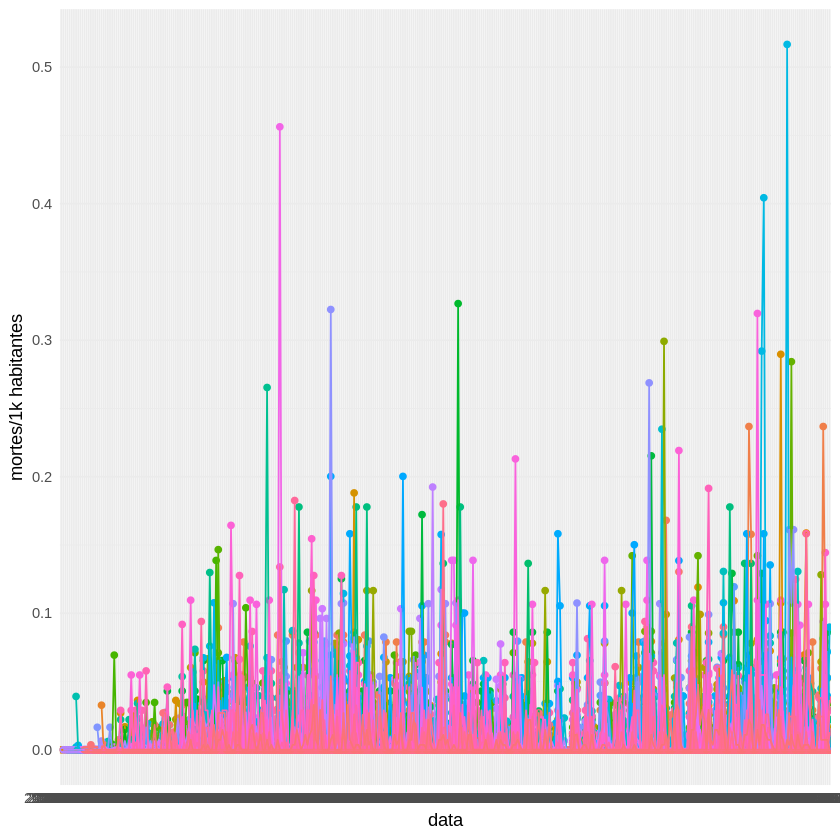

In [33]:
ggplot(dados, aes(x=date, y=deaths_day_per_1k_inhabitants, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes/1k habitantes") +
  theme_minimal()

<p>Agora os dados parecem na mesma escala. Melhorou!</p>

<p>Agora transformar em dados temporais:</p>

In [34]:
# seleciona apenas colunas de interesse
temp <- dados[ , c(1,2,12)]

# atributos e registros
municipios <- sort(unique(temp$city))
datas_ordenadas <- as.character(sort(unique(temp$date)))

# define o formato do conjunto de dados
linhas <- length(datas_ordenadas)
colunas <- length(municipios)

D <- array(0, dim=c(linhas, colunas))

# nomes para as linhas e colunas
rownames(D) <- datas_ordenadas
colnames(D) <- municipios

# dados do numero de mortes de cada municipio para determinada data
for (municipio in municipios) {
  for (data in datas_ordenadas) {
    dado <- 0
    registro <- temp[temp$city==municipio & temp$date == data, ]
    if (nrow(registro) > 0) {
      dado <- temp[temp$city==municipio & temp$date == data, 3]
    }
    D[data, municipio] <- dado
  }
}

<p>Como ficou?</p>

In [35]:
D

,Angra dos Reis,Aperibé,Araruama,Areal,Armação dos Búzios,Arraial do Cabo,Barra do Piraí,Barra Mansa,Belford Roxo,Bom Jardim,...,Silva Jardim,Sumidouro,Tanguá,Teresópolis,Trajano de Moraes,Três Rios,Valença,Varre-Sai,Vassouras,Volta Redonda
2020-03-05,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
2020-03-06,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
2020-03-08,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
2020-03-12,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
2020-03-15,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
2020-03-16,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
2020-03-18,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
2020-03-19,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
2020-03-21,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
2020-03-22,0,0,0,0,0,0.00000000,0,0,0.000000000,0,...,0,0,0.00000000,0,0,0,0,0,0,0.000000000
